In [1]:
import numpy as np
import pandas as pd
import matplotlib

In [2]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\shawo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *

from nltk import tokenize

In [4]:
tweets=pd.read_csv("input_data/clean_unique_tweet.csv",encoding = "ISO-8859-1")

In [5]:
tweets.columns

Index(['id', 'retwc', 'hashtag', 'hasrt', 'hastag', 'numurls', 'cleantext',
       'textlen', 'wordCount'],
      dtype='object')

In [6]:
sid = SentimentIntensityAnalyzer()

tweets['sentiment_compound_polarity']=tweets.cleantext.apply(lambda x:sid.polarity_scores(x)['compound'])
tweets['sentiment_neutral']=tweets.cleantext.apply(lambda x:sid.polarity_scores(x)['neu'])
tweets['sentiment_negative']=tweets.cleantext.apply(lambda x:sid.polarity_scores(x)['neg'])
tweets['sentiment_pos']=tweets.cleantext.apply(lambda x:sid.polarity_scores(x)['pos'])
tweets['sentiment_type']=''
tweets.loc[tweets.sentiment_compound_polarity>0,'sentiment_type']='POSITIVE'
tweets.loc[tweets.sentiment_compound_polarity==0,'sentiment_type']='NEUTRAL'
tweets.loc[tweets.sentiment_compound_polarity<0,'sentiment_type']='NEGATIVE'

<AxesSubplot:title={'center':'sentiment analysis'}>

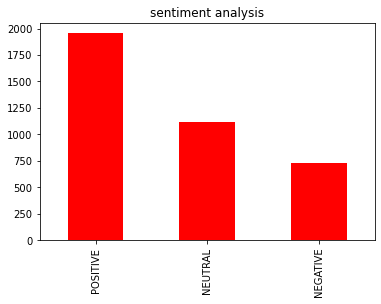

In [8]:
tweets.sentiment_type.value_counts().plot(kind='bar',color = 'red', title="sentiment analysis")